# Auto Search Tutorial

This tutorial will demonstrate how to use the autoSearch module.

**Files needed:** ```001_layers.csv``` and ```expt_XRD.txt```

In [1]:
# import package
import pyfaults as pf

In [2]:
# set file directories
filePath = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/files/"
path = "C:/Users/sincl/packages/pyfaults/pyfaults/tutorials/autoSearchTest/"

In [3]:
# generate unit cell
latt = pf.Lattice(a=6.398, b=11.04, c=6.391, alpha=90, beta=109.89, gamma=90)
layerList = ["A", "B"]

unitcell = pf.autoSearch.genUnitCell("(001) Stack Unitcell", filePath, "001_layers", latt, layerList, "c")

In [4]:
# set search parameters

# number of stacks per supercell
nStacks = 100

# faulted layer
fltLayer = "A"

# fault probabilities to search
probList = [0.2, 0.3]

# stacking vectors to search
sVecList = [[0, 0.25, 0], [0, 0.33333, 0]]

# peaks of interest, listed here is one unbroadened reflection (001) and 4 broadened reflections
peakLabels = ["(001)", "(020)", "(110)", "(11-1)", "(021)"]

# Q positions of each peak of interest
peakQ = [1.05, 1.14, 1.19, 1.33, 1.56]

# simulated peak broadening
simPW = 0.0

# peak broadening range to include when calculating goodness of fit
calcPW = 0.05

# instrument wavelength
wl = 0.459744

# maximum 2theta for simulation calculations
maxTT = 12

In [5]:
# import experimental data
exptQ, exptNorm = pf.autoSearch.importExpt(filePath, "expt_XRD", wl, maxTT)

In [6]:
# autoSearch function

search, fitDiffDF, peakDF = pf.autoSearch.autoSearch(path, unitcell, [exptQ, exptNorm], nStacks, fltLayer, probList, sVecList, 
                                                     peakLabels, peakQ, calcPW, wl, maxTT, simPW=simPW)

Finished generating supercell CIFs: 
Unfaulted
S1_P20
S2_P20
S1_P30
S2_P30
Scatter(Unfaulted with 2400 atomic positions, 1 symmetries)
       Type: xray
     Energy: 8.048 keV
 Wavelength: 1.5405619896714298 A
 ---Settings---
      Powder units: tth
    Isotropic ADPs: True
  Specular Direction (reflection): ( 0, 0, 1)
Parallel Direction (transmission): ( 0, 0, 1)
      theta offset: 0.0
         min theta: -180.0
         max theta: 180.0
      min twotheta: -180.0
      max twotheta: 180.0
 ---X-Ray Settings---
 Waasmaier scattering factor: False
 ---Magnetic Settings---
   Mag. scattering: True
  Mag. form factor: True
         Polarised: False
      Polarisation: sp
       Pol. vector: (0,1,0)
 ---Resonant Settings---
   Azimuthal angle: 0
    Azimuthal ref.: (1,0,0)
               flm: (0,1,0)
  use e1e1 approx.: True

Splitting 16353 reflections (2400 atoms) into 4 parts
 Starting  1/ 4: 0:4089
 Starting  2/ 4: 4089:8177
 Starting  3/ 4: 8177:12265
 Starting  4/ 4: 12265:16353
Sc

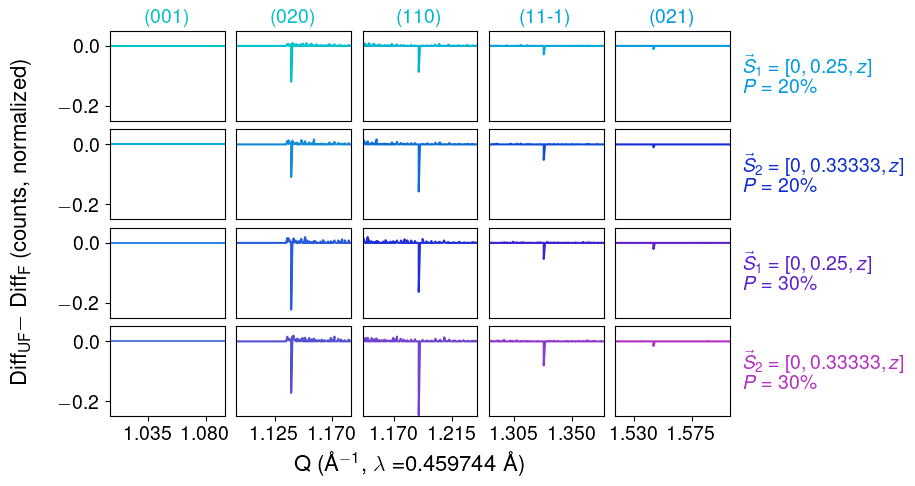

In [7]:
# plot search results
ax = pf.autoSearch.plotSearchResults(fitDiffDF, peakDF, 0.02, wl, [-0.25, 0.05], rowAdj=0.01, colAdj=0.01, xLabelAdj=-0.01)

for i in range(5):
    pf.plotXRD.setTickSpacing(ax[-1][i], "x", 0.045)

See ```pyfaults/tutorials/autoSearchTest``` for output files